In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [4]:
df = pd.read_csv('MultiJetRun2010B.csv')

In [5]:
df.head()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.893,-54.03420,-58.9032,142.1790,70.0254,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.150,6.88361,-12.9688,73.9025,-72.2472,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.902,102.64000,-101.9350,535.5510,-110.3790,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.024,-62.95350,-47.7434,112.8510,89.0843,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.410,-16.65900,-827.4980,445.6120,-91.1991,15.55830,-390.1440,269.492,8.11345,3,0


In [9]:
df.columns

Index(['Run', 'Lumi', 'Event', 'MR', 'Rsq', 'E1', 'Px1', 'Py1', 'Pz1', 'E2',
       'Px2', 'Py2', 'Pz2', 'HT', 'MET', 'nJets', 'nBJets'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21726 entries, 0 to 21725
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     21726 non-null  int64  
 1   Lumi    21726 non-null  int64  
 2   Event   21726 non-null  int64  
 3   MR      21726 non-null  float64
 4   Rsq     21726 non-null  float64
 5   E1      21726 non-null  float64
 6   Px1     21726 non-null  float64
 7   Py1     21726 non-null  float64
 8   Pz1     21726 non-null  float64
 9   E2      21726 non-null  float64
 10  Px2     21726 non-null  float64
 11  Py2     21726 non-null  float64
 12  Pz2     21726 non-null  float64
 13  HT      21726 non-null  float64
 14  MET     21726 non-null  float64
 15  nJets   21726 non-null  int64  
 16  nBJets  21726 non-null  int64  
dtypes: float64(12), int64(5)
memory usage: 2.8 MB


In [11]:
df.describe()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
count,21726.000000,21726.000000,2.172600e+04,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000
mean,148666.049710,900.693501,8.635646e+08,351.981435,0.023253,297.178955,0.283289,0.764211,-8.523257,277.410117,-0.399385,-0.909938,-1.915512,242.328342,16.005371,2.435791,0.053668
std,596.085618,496.482684,4.786516e+08,193.691363,0.023291,224.040020,91.701247,90.770124,341.366770,206.890743,76.720135,75.758491,321.415092,78.841528,10.797882,0.655750,0.236334
min,147926.000000,388.000000,3.023155e+08,29.999900,0.000009,44.947600,-543.821000,-648.385000,-2022.310000,42.048600,-700.112000,-459.801000,-1647.600000,120.938000,0.100445,2.000000,0.000000
25%,148029.000000,463.000000,4.976106e+08,229.790750,0.007907,143.531000,-78.472975,-75.770000,-151.347750,126.916250,-63.333250,-62.706450,-154.231750,193.252000,8.626845,2.000000,0.000000
50%,149181.000000,986.000000,9.709389e+08,292.911000,0.016817,212.060500,-0.310509,1.238670,-5.478110,204.140000,-0.548208,-1.900460,-1.803295,223.696000,14.035000,2.000000,0.000000
75%,149181.000000,999.000000,9.844834e+08,406.883000,0.031612,374.542750,78.562475,77.738075,135.345250,366.710500,62.852025,61.111550,151.167750,269.241500,21.091050,3.000000,0.000000
max,149181.000000,1804.000000,1.703645e+09,2433.820000,0.763695,2101.580000,722.291000,470.234000,2061.890000,1843.360000,405.326000,635.734000,1830.370000,1462.630000,423.144000,7.000000,2.000000


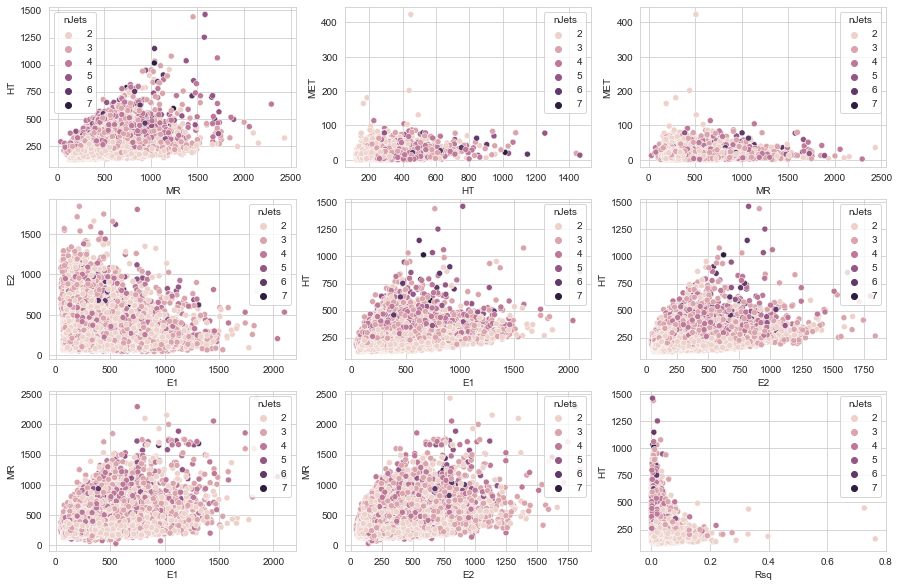

In [12]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(15,10))
ax = ax.flatten()
sns.scatterplot(ax=ax[0],x='MR',y='HT',data=df,hue='nJets')
sns.scatterplot(ax=ax[1],x='HT',y='MET',data=df,hue='nJets')
sns.scatterplot(ax=ax[2],x='MR',y='MET',data=df,hue='nJets')
sns.scatterplot(ax=ax[3],x='E1',y='E2',data=df,hue='nJets')
sns.scatterplot(ax=ax[4],x='E1',y='HT',data=df,hue='nJets')
sns.scatterplot(ax=ax[5],x='E2',y='HT',data=df,hue='nJets')
sns.scatterplot(ax=ax[6],x='E1',y='MR',data=df,hue='nJets')
sns.scatterplot(ax=ax[7],x='E2',y='MR',data=df,hue='nJets')
sns.scatterplot(ax=ax[8],x='Rsq',y='HT',data=df,hue='nJets')
plt.show()

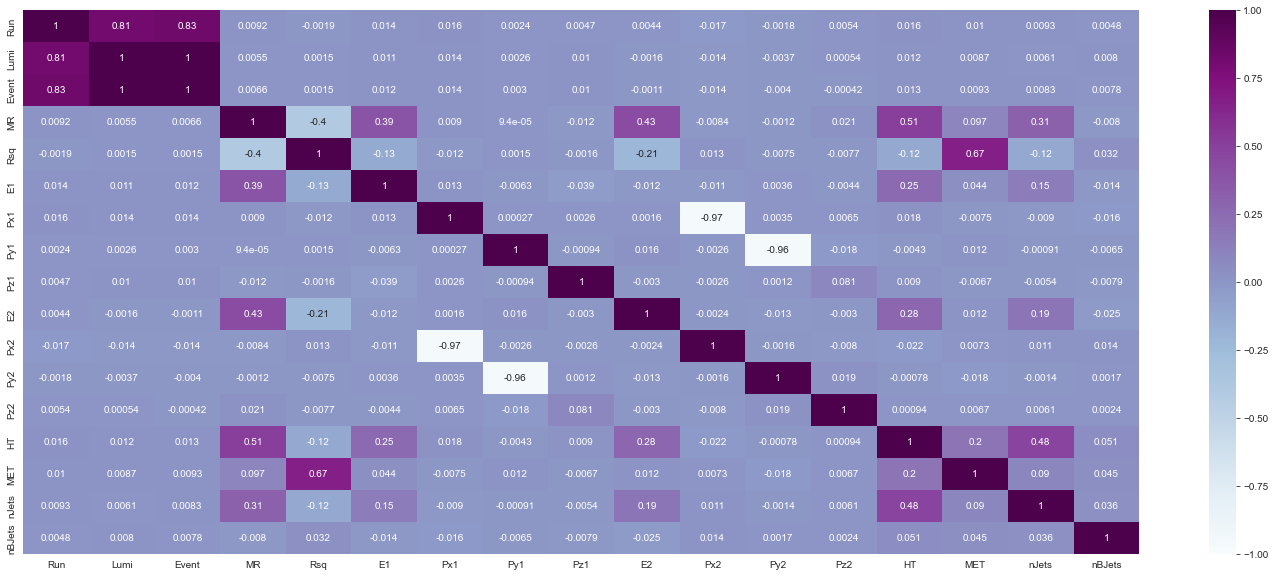

In [13]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='BuPu')
plt.show()

In [14]:
y = df['nJets']
df = df.drop('nJets',axis=1)
df = df.drop('Event',axis=1)
train_x,test_x,train_y,test_y = train_test_split(df,y,test_size=0.2,random_state=42)
run = test_x['Run'].copy() # will be used as run column of solution data frame
drop = ['Run','nBJets','Lumi','MET','Rsq']
test_x = test_x.drop(drop,axis=1)
train_x = train_x.drop(drop,axis=1)
train_x

,MR,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT
19212,408.746,123.760,-93.5937,70.68340,30.8586,805.5610,59.6260,-61.73490,800.93200,203.114
19180,375.435,204.667,154.9960,-29.33120,129.3990,688.6590,-104.1990,18.86960,680.07700,263.641
15004,354.035,245.294,14.4537,122.92700,-210.9850,140.0630,-22.8405,-119.85100,65.11650,245.781
3204,284.501,117.535,36.1436,60.88620,92.3275,177.4090,-17.2480,-67.16220,-162.49800,140.148
2549,445.961,379.753,-158.2800,30.92680,-318.3700,171.6900,145.8860,-31.67250,57.26140,334.942
...,...,...,...,...,...,...,...,...,...,...
11964,268.860,150.790,118.4550,6.66933,92.1536,120.2920,-93.1936,-5.17192,-74.19200,211.979
21575,188.521,155.612,73.5540,-9.03438,-136.4470,74.5654,-66.7214,-28.02140,8.05937,146.474
5390,193.131,138.980,-43.0585,-90.25690,-94.6686,144.6650,49.1845,78.29780,-110.01600,192.466
860,279.580,900.862,-68.3524,92.00190,893.4240,177.9860,51.8795,-83.21340,147.88900,212.675


In [16]:
model = RandomForestClassifier()

In [18]:
model.fit(train_x, train_y)

RandomForestClassifier()

In [19]:
predict = model.predict(test_x)

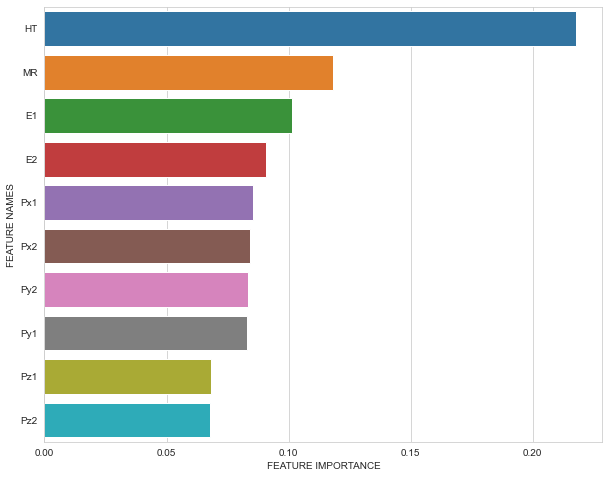

In [20]:
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(train_x.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

In [21]:
score = accuracy_score(test_y,predict)
print(score)

0.7820984813621721


In [24]:
import tensorflow as tf
from tensorflow import keras
#import tensorflow.keras.Layers as L
import tensorflow.keras.layers as L

In [25]:
input_shape=10

In [26]:
train_y.unique()

array([2, 4, 3, 5, 7, 6])

In [27]:
model = keras.Sequential()
model.add(L.Input(shape=input_shape))
model.add(L.Dense(128))
model.add(L.ReLU())
model.add(L.Dense(64))
model.add(L.ReLU())
model.add(L.Dense(8))
model.add(L.Softmax())

2022-04-08 18:46:11.175853: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 softmax (Softmax)           (None, 8)                 0         
                                                                 
Total params: 10,184
Trainable params: 10,184
Non-traina

In [29]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=keras.metrics.SparseCategoricalAccuracy())

In [30]:
model.fit(x=train_x,y=train_y,epochs=30)

Epoch 1/30
544/544 [==============================] - 1s 1ms/step - loss: 4.8697 - sparse_categorical_accuracy: 0.5587
Epoch 2/30
544/544 [==============================] - 1s 1ms/step - loss: 1.7749 - sparse_categorical_accuracy: 0.6327
Epoch 3/30
544/544 [==============================] - 1s 1ms/step - loss: 1.0624 - sparse_categorical_accuracy: 0.6906
Epoch 4/30
544/544 [==============================] - 1s 2ms/step - loss: 0.8274 - sparse_categorical_accuracy: 0.7284
Epoch 5/30
544/544 [==============================] - 1s 1ms/step - loss: 0.7109 - sparse_categorical_accuracy: 0.7619
Epoch 6/30
544/544 [==============================] - 1s 1ms/step - loss: 0.6758 - sparse_categorical_accuracy: 0.7784
Epoch 7/30
544/544 [==============================] - 1s 1ms/step - loss: 0.6480 - sparse_categorical_accuracy: 0.7900
Epoch 8/30
544/544 [==============================] - 1s 1ms/step - loss: 0.6247 - sparse_categorical_accuracy: 0.7950
Epoch 9/30
544/544 [============================

In [31]:
preds = model.predict(test_x)

In [32]:

prediction = np.argmax(preds,axis=1)

In [33]:
accuracy_score(prediction,test_y)

0.5878969167050161

In [34]:
solution = pd.DataFrame({'Run':run,'nJets':prediction})
solution

,Run,nJets
13474,149181,3
4954,147926,3
14301,149181,4
18423,149181,3
563,148029,3
...,...,...
12587,149181,3
8129,147926,3
10476,149181,3
10455,149181,3


In [35]:
solution.to_csv('submission.csv',index=False)